<a href="https://colab.research.google.com/github/MIREHMAN/Data-Analysis/blob/main/Titanic_Survivor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data=pd.read_csv('/content/train.csv')

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<ipython-input-4-14d7ce9b05c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), annot=True, cmap='YlGnBu')


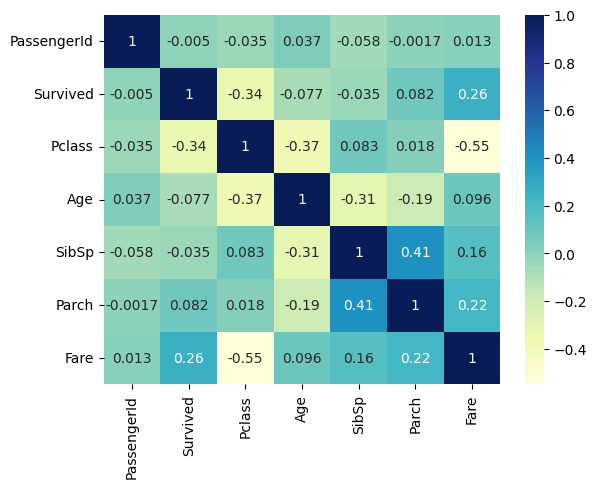

In [4]:
sns.heatmap(titanic_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.2)


In [6]:
for train_indices, test_indices in split.split(titanic_data, titanic_data[['Survived', 'Pclass', 'Sex']]):
  train_set=titanic_data.loc[train_indices]
  test_set=titanic_data.loc[test_indices]

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class Age_Imputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.imputer = SimpleImputer(strategy='mean')
        self.imputer.fit(X[['Age']])
        return self

    def transform(self, X):
        X['Age'] = self.imputer.transform(X[['Age']])
        return X


In [8]:
from sklearn.preprocessing import OneHotEncoder


class Feature_Encoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoder_embarked = OneHotEncoder()
        self.encoder_sex = OneHotEncoder()
        self.encoder_embarked.fit(X[['Embarked']])
        self.encoder_sex.fit(X[['Sex']])
        return self

    def transform(self, X):
        # Transform 'Embarked' feature
        matrix_embarked = self.encoder_embarked.transform(X[['Embarked']]).toarray()
        column_names_embarked = ['C', 'S', 'Q']
        for i in range(len(column_names_embarked)):
            X[column_names_embarked[i]] = matrix_embarked.T[i]

        # Transform 'Sex' feature
        matrix_sex = self.encoder_sex.transform(X[['Sex']]).toarray()
        column_names_sex = ['male', 'female']
        for i in range(len(column_names_sex)):
            X[column_names_sex[i]] = matrix_sex.T[i]

        return X



In [9]:
class Feature_Dropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y='none'):
    return self
  def transform(self, X):
    return X.drop(['Embarked','Name','Ticket','Sex','Cabin'], axis=1)

In [10]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer", Age_Imputer()), ("featureencoder", Feature_Encoder()), ("featuredropper", Feature_Dropper())])

In [11]:
train_set=pipeline.fit_transform(train_set)

In [12]:
train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,male,female
82,83,1,3,29.398284,0,0,7.7875,0.0,1.0,0.0,1.0,0.0
475,476,0,1,29.398284,0,0,52.0000,0.0,0.0,1.0,0.0,1.0
592,593,0,3,47.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
575,576,0,3,19.000000,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
245,246,0,1,44.000000,2,0,90.0000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
692,693,1,3,29.398284,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
315,316,1,3,26.000000,0,0,7.8542,0.0,0.0,1.0,1.0,0.0
673,674,1,2,31.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
342,343,0,2,28.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0


In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 82 to 343
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  male         712 non-null    float64
 11  female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


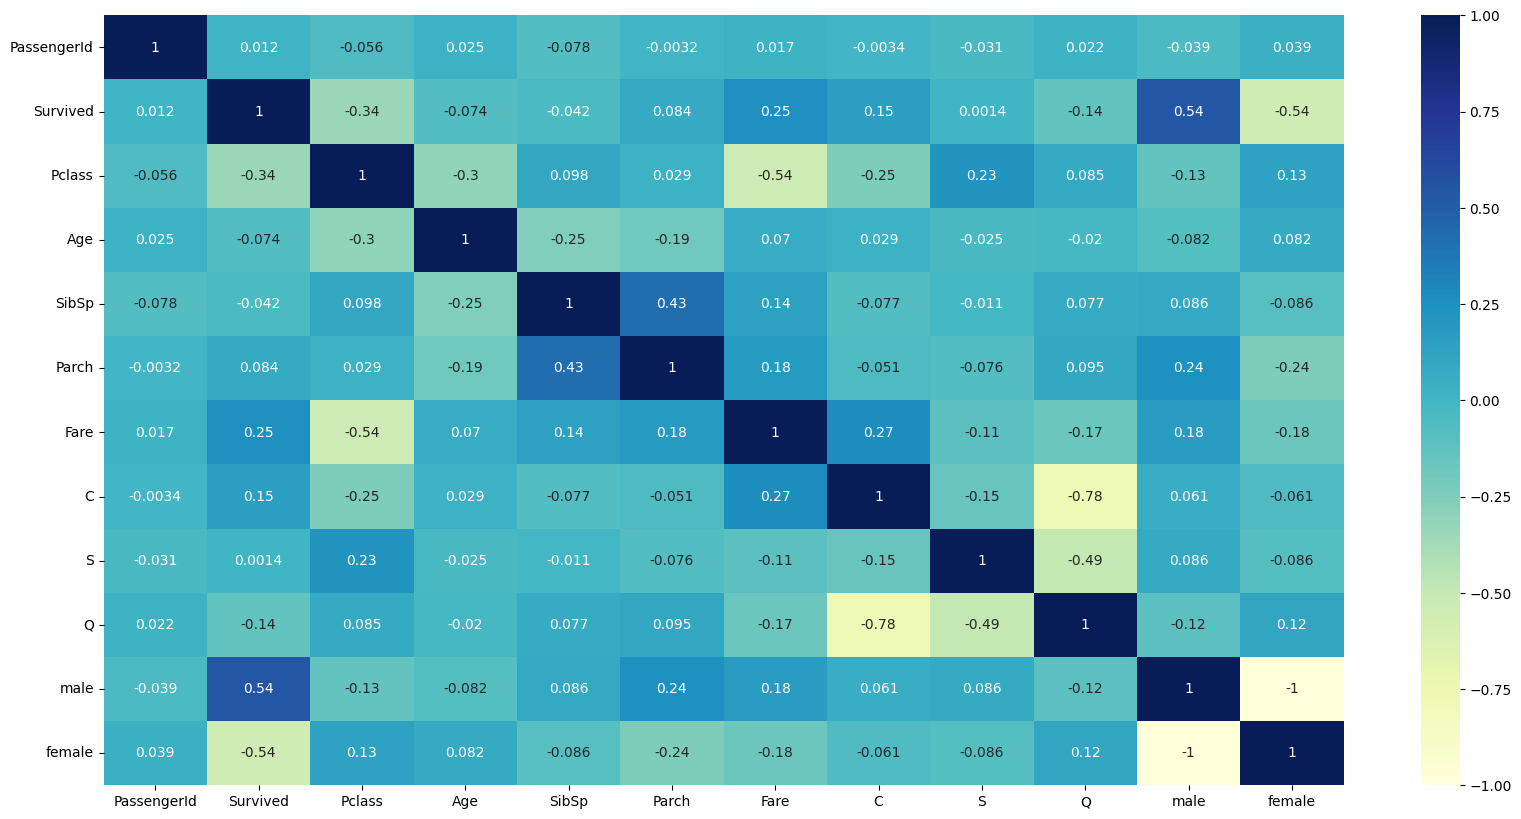

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(train_set.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [15]:
train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,male,female
82,83,1,3,29.398284,0,0,7.7875,0.0,1.0,0.0,1.0,0.0
475,476,0,1,29.398284,0,0,52.0000,0.0,0.0,1.0,0.0,1.0
592,593,0,3,47.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
575,576,0,3,19.000000,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
245,246,0,1,44.000000,2,0,90.0000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
692,693,1,3,29.398284,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
315,316,1,3,26.000000,0,0,7.8542,0.0,0.0,1.0,1.0,0.0
673,674,1,2,31.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
342,343,0,2,28.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0


In [16]:
Y=train_set['Survived']
X=train_set.drop(['Survived'],axis=1)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
Y_scaled=Y.to_numpy()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4],
}

grid_search=GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_scaled,Y_scaled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [18]:
final_clf=grid_search.best_estimator_

In [19]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=200)

In [20]:
test_set=pipeline.fit_transform(test_set)

In [21]:
X_test=test_set.drop(['Survived'], axis=1)
Y_test=test_set['Survived']
scalar=StandardScaler()
X_test_s=scalar.fit_transform(X_test)
Y_test_s=Y_test.to_numpy()

In [27]:
final_clf.score(X_test_s,Y_test_s)

0.8044692737430168

In [23]:
final_data=pipeline.fit_transform(titanic_data)

In [24]:
X_final=final_data.drop(["Survived"],axis=1)
Y_final=final_data["Survived"]

In [25]:
scalar=StandardScaler()
X_final_s=scalar.fit_transform(X_final)
Y_final_s=Y_final.to_numpy()

In [26]:
prod_clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4],
}

grid_search=GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_final_s,Y_final_s)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [28]:
prod_final_clf=grid_search.best_estimator_

In [29]:
prod_final_clf

RandomForestClassifier(max_depth=10)

In [30]:
prod_final_clf.score(X_test_s,Y_test_s)

0.8938547486033519

In [31]:
titanic_test_data = pd.read_csv("/content/test.csv")

In [32]:
titanic_test_data=pipeline.fit_transform(titanic_test_data)

In [33]:
titanic_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,male,female
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [34]:
X_final_test=titanic_test_data
X_final_test=X_final_test.fillna(method="ffill")

In [36]:
scalar=StandardScaler()
X_data_final_test=scalar.fit_transform(X_final_test)

In [51]:
predictions=prod_final_clf.predict(X_data_final_test)

In [52]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
final_df= pd.DataFrame(titanic_test_data['PassengerId'])

In [59]:
final_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [60]:
final_df['Survived']=predictions

In [61]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
final_df.to_csv("/content/predictions.csv", index=False)